In [2]:
import pandapower as pp
import pandapower.networks as nw
import pandapower.plotting as pplt
import matplotlib.pyplot as plt

In [6]:
net=nw.create_cigre_network_mv()

# limits
vmax=1.05
vmin=0.95
max_ll=100.

lines=net.line.index

critical =list()

for l in lines:
    net.line.loc[l, "in_service"] = False
    pp.runpp(net)
    
    if net.res_bus.vm_pu.max() >vmax or net.res_bus.vm_pu.min() <vmin or net.res_line.loading_percent.max()>max_ll:
        critical.append(l)
    net.line.loc[l, "in_service"]= True

print(critical)

[3, 4, 5, 7, 8, 10, 11, 12, 13, 14]


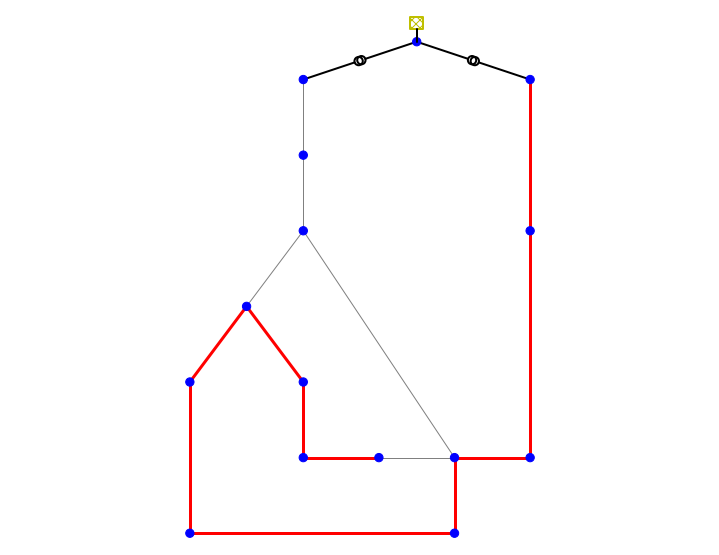

In [9]:
ax=pplt.simple_plot(net, show_plot=False)
clc=pplt.create_line_collection(net, critical, color="r", linewidth=3., use_bus_geodata=True )
pplt.draw_collections([clc], ax=ax)
plt.show()